## Twitter Task
1. Collect last week tweets
2. Convert into vectors (TFID or others)
3. Get Similarities
4. Create Clusters/ Visualization (optional) 
5. Manually inspect a few from each clusters
6. verify sentiments (NEG, POS, NEU)

In [ ]:
import tweepy
import csv
import datetime
import time
import pandas as pd
from tqdm import tqdm
import regex as re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Access key and consumer key
access_key = ""
access_secret = ""
consumer_key = ""
consumer_secret = ""

In [ ]:
def get_tweepy_api(access_key,access_secret,consumer_key,consumer_secret):
    
    # authorizing  twitter, initializing  tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    # Setting wait_on_rate_limit and wait_on_rate_limit_notify to True makes the API object print a message and 
    #wait if the rate limit is exceeded
  
    # Create API object
    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    # api = tweepy.API(auth)

    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    
    return api

In [ ]:
def extract_tweets(keywords,count):
  try:

    today = datetime.date.today()
    yesterday= today - datetime.timedelta(days=6)

    tweets_list = []
    api = get_tweepy_api(access_key,access_secret,consumer_key,consumer_secret)

    
    # setting tweet_mode equal to 'extended' will allows us to get the full text(tweet.full_text) instead instead of tweet.text 
    # which is limit to 140 character

    # For searching for no retweets "-filter:retweets" and For searching for only retweets "filter:retweets"
    filter_retweet = "-filter:retweets"
    # tweets = tweepy.Cursor(api.search, q=keywords+filter_retweet, since=str(yesterday),until=str(today),\
                            # tweet_mode='extended', lang='en').items(count)

    tweets = tweepy.Cursor(api.search, q=keywords+filter_retweet,until=str(today),\
                            tweet_mode='extended', lang='en').items(count)

    # Pulling information from tweets iterable object
    # tweets_list = [[tweet.created_at, tweet.id, tweet.full_text.encode('utf-8'),tweet.user.screen_name] for tweet in tqdm(tweets)]
    tweets_list = [[tweet.created_at, tweet.id, tweet.full_text,tweet.user.screen_name] for tweet in tqdm(tweets)]

  except BaseException as e:
    print('failed on_status,',str(e))
    time.sleep(3)
    return tweets_list
  return tweets_list

In [ ]:
today = datetime.date.today()

In [ ]:
# key_words = ['datascience','datanalytics','dataengineer']
key_words = ['datascience']
count = 3000

for key in key_words:
  tweets_list = extract_tweets(key.lower(),count)
  columns_name = ['created_at','id','full_text','screen_name']
  tweets_df = pd.DataFrame(tweets_list,columns=columns_name)
  tweets_df.to_csv('/content/drive/MyDrive/Colab Notebooks/sem3/tweets_related_to_'+key+'.csv', sep=',',index=False)


In [ ]:
tweets_list

[]

In [ ]:
tweets_df['created_at'].value_counts()

2022-05-31 08:30:00    2
2022-06-01 22:21:22    1
2022-05-27 11:26:55    1
2022-05-27 15:03:02    1
2022-05-27 14:43:03    1
                      ..
2022-05-30 16:03:28    1
2022-05-30 16:03:03    1
2022-05-30 15:00:03    1
2022-05-30 14:43:03    1
2022-05-25 09:02:23    1
Name: created_at, Length: 173, dtype: int64

## Load Data from Drive

In [ ]:
full_path = '/content/drive/MyDrive/Colab Notebooks/sem3/tweets_related_to_datascience.csv'
# full_path = '/content/drive/MyDrive/Colab Notebooks/tweets/tweets_related_to_Cryptocurrency.csv'
df = pd.read_csv(full_path,index_col=False,header=0,engine='python')
df.head()

,created_at,id,full_text,screen_name
0,2022-06-01 23:59:35,1532149894592479245,Here is how AI saves you thousands of dollars\...,Mlearning_ai
1,2022-06-01 23:59:10,1532149791043555330,@john31337 @iStunt_YT @nonametweetr @allisonge...,rs_datascience
2,2022-06-01 23:53:44,1532148422832168960,Different path row are merged. At soon for the...,stangandaho
3,2022-06-01 23:53:14,1532148298244575239,Is anyone keeping a running tab of all gun vio...,lamlak_clg
4,2022-06-01 23:52:39,1532148148382191618,Introduction to Machine Learning with Python: ...,Datascience__


In [ ]:
df['created_at'].value_counts()

2022-06-01 22:32:04    4
2022-06-01 00:00:07    4
2022-06-01 07:30:00    4
2022-05-31 20:18:48    4
2022-06-01 00:00:01    4
                      ..
2022-06-01 09:29:13    1
2022-06-01 09:28:44    1
2022-06-01 09:28:00    1
2022-06-01 09:27:19    1
2022-05-31 08:47:56    1
Name: created_at, Length: 4675, dtype: int64

In [ ]:
df.describe()

,id
count,5.000000e+03
mean,1.531837e+18
std,1.675138e+14
min,1.531558e+18
25%,1.531684e+18
50%,1.531842e+18
75%,1.531983e+18
max,1.532150e+18


In [ ]:
# dropping null values
df.dropna(axis=0,inplace=True)

In [ ]:
df.describe()

,id
count,5.000000e+03
mean,1.531837e+18
std,1.675138e+14
min,1.531558e+18
25%,1.531684e+18
50%,1.531842e+18
75%,1.531983e+18
max,1.532150e+18


In [ ]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=9f3b6ef49d6d5e880783d2aadbb9b79ddfa21b077d1fb9252662521aee013028
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


In [ ]:
# preprocessing

def replace_two_ormore(tweets):
    # look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", tweets)

def removed_stopwords(text):
    
    text_token_wo_stopwords = []
    stopwordsEng = stopwords.words('english')
    myOwn_stopwords = ['https','#','!','$',',','(',')','.','``','at_user','url','rt','im','%','&', 'amp', ';','eth…',':']+stopwordsEng
    # myOwn_stopwords = stopwordsEng
    word_tokens  = word_tokenize(text)
  
    for word in word_tokens:
        if word.lower() not  in myOwn_stopwords:
            text_token_wo_stopwords.append(word)
    
    return text_token_wo_stopwords

def process_tweets(tweets):
    clean_tweet = []

    # convert to lower
    tweets = tweets.lower()
    
    # remove www.* or https?://*
    tweets = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', tweets)

    # remove number
    tweets = re.sub(r'(?:(?:\d+,?)+(?:\.?\d+)?)', '', tweets)

    # Replace #word with word
    tweets = re.sub(r'#([^\s]+)', r'\1', tweets)

    # remove @word 
    tweets = re.sub(r'@([^\s]+)', '', tweets)
    # trim
    tweets = tweets.strip('\'"')

    #removed emoji
    tweets = ''.join(c for c in tweets if c not in emoji.UNICODE_EMOJI) #Remove Emojis


    # tweets = remove_emojis(tweets)

    #remove stop words
    tweets = removed_stopwords(tweets)

    for word in tweets:
        word = replace_two_ormore(word)

        if len(word)>2:
          # strip punctuation
          word = re.sub(r'[^\w\s]','',word)

          # check if the word starts with an alphabet
          val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", word)
          # print(word)
          if val is None:
            continue
          else:
            clean_tweet.append(word)

    return clean_tweet


In [ ]:
cleaned_tweets = []
for tweet in df['full_text']:
  tweets = process_tweets(tweet)
  cleaned_tweets.append(tweets)


In [ ]:
cleaned_tweets[0]

['saves',
 'thousands',
 'dollars',
 'art',
 'aiart',
 'machinelearning',
 'deeplearning',
 'mlsogood',
 'artificialintelligence',
 'datascience',
 'iiot',
 'devops',
 'data',
 'code',
 'python',
 'bigdata',
 'mlart',
 'algorithm',
 'programmer',
 'pytorch',
 'datascientist',
 'analytics']

In [ ]:
df["clean_text"] = cleaned_tweets

In [ ]:
df.head()

,created_at,id,full_text,screen_name,clean_text
0,2022-06-01 23:59:35,1532149894592479245,Here is how AI saves you thousands of dollars\...,Mlearning_ai,"[saves, thousands, dollars, art, aiart, machin..."
1,2022-06-01 23:59:10,1532149791043555330,@john31337 @iStunt_YT @nonametweetr @allisonge...,rs_datascience,"[ugh, wow, nt, think, cyber, live, life, writi..."
2,2022-06-01 23:53:44,1532148422832168960,Different path row are merged. At soon for the...,stangandaho,"[different, path, row, merged, soon, final, pr..."
3,2022-06-01 23:53:14,1532148298244575239,Is anyone keeping a running tab of all gun vio...,lamlak_clg,"[anyone, keeping, running, tab, gun, violence,..."
4,2022-06-01 23:52:39,1532148148382191618,Introduction to Machine Learning with Python: ...,Datascience__,"[introduction, machine, learning, python, guid..."


In [ ]:
df['created_at'] = df.created_at.apply(lambda x: pd.to_datetime(x).strftime('%Y-%m-%d'))
df.head()

,created_at,id,full_text,screen_name,clean_text
0,2022-06-01,1532149894592479245,Here is how AI saves you thousands of dollars\...,Mlearning_ai,"[saves, thousands, dollars, art, aiart, machin..."
1,2022-06-01,1532149791043555330,@john31337 @iStunt_YT @nonametweetr @allisonge...,rs_datascience,"[ugh, wow, nt, think, cyber, live, life, writi..."
2,2022-06-01,1532148422832168960,Different path row are merged. At soon for the...,stangandaho,"[different, path, row, merged, soon, final, pr..."
3,2022-06-01,1532148298244575239,Is anyone keeping a running tab of all gun vio...,lamlak_clg,"[anyone, keeping, running, tab, gun, violence,..."
4,2022-06-01,1532148148382191618,Introduction to Machine Learning with Python: ...,Datascience__,"[introduction, machine, learning, python, guid..."


## TFID Vectorization and Cosine Similarity

In [ ]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
""" Get vectors from text using tfidf"""
def get_vecotrs(document):
    text = [doc for doc in document]
    # print(text)

    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vectorizer.fit(text)
    myVectors = tfidf_vectorizer.transform(text).toarray()
    return myVectors
    

# get cosine similarity
def get_cosine_similarity(received_vectors):
    return cosine_similarity(received_vectors)

In [ ]:
# Getting TFIDF 
input_text = [" ".join(x) for x in df['clean_text']]

vectors = get_vecotrs(input_text)

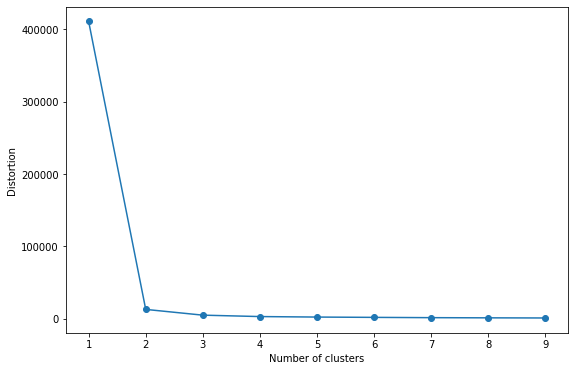

In [ ]:

distortions = []
for i in range (1,10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               random_state=0)
    km.fit(cos_sim_pca)
    distortions.append(km.inertia_)
    
plt.plot(range(1,10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
# Cluster determination using silhouette methods
silhouette = {}
for i in range (2,10):
    km = KMeans(n_clusters=i,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=1e-04,
               random_state=0)
    km.fit(cos_sim_pca)
    silhouette[i] = metrics.silhouette_score(X, km.labels_, metric='euclidean')

silhouette

NameError: ignored

In [ ]:
cos_similarity = get_cosine_similarity(vectors)
print(cos_similarity)

[[1.         0.02088985 0.00182991 ... 0.02941499 0.03308166 0.13452928]
 [0.02088985 1.         0.         ... 0.         0.         0.        ]
 [0.00182991 0.         1.         ... 0.00158366 0.00235157 0.03067403]
 ...
 [0.02941499 0.         0.00158366 ... 1.         0.0191897  0.02593899]
 [0.03308166 0.         0.00235157 ... 0.0191897  1.         0.0365331 ]
 [0.13452928 0.         0.03067403 ... 0.02593899 0.0365331  1.        ]]


In [ ]:
cos_similarity.shape

(5000, 5000)

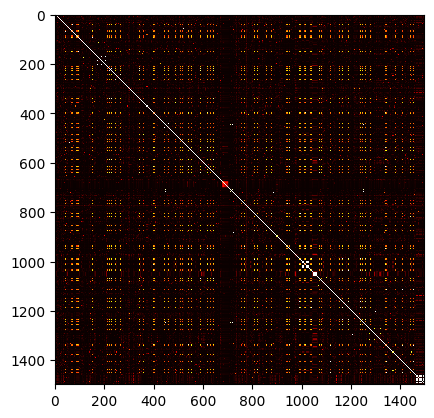

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cos_similarity, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
df["cosine_similarity"] = list(cos_similarity)
df.head(2)


,created_at,id,full_text,screen_name,clean_text,cosine_similarity
0,2022-06-01,1532149894592479245,Here is how AI saves you thousands of dollars\...,Mlearning_ai,"[saves, thousands, dollars, art, aiart, machin...","[0.9999999999999999, 0.020889849390444325, 0.0..."
1,2022-06-01,1532149791043555330,@john31337 @iStunt_YT @nonametweetr @allisonge...,rs_datascience,"[ugh, wow, nt, think, cyber, live, life, writi...","[0.020889849390444325, 1.0, 0.0, 0.0, 0.0, 0.0..."


In [ ]:
type(cos_similarity)

numpy.ndarray

In [ ]:
# n = cos_sim_pca.shape[0]
n = 20
for i in range(n):
    x = cos_sim_pca[i,0]
    y = cos_sim_pca[i,1]
    label = "Text-"+str(i+1)
    plt.scatter(x,y,s=500)
    plt.text(x+0.025,y+0.025,label,fontsize=10)
plt.show()

In [ ]:
# Reduce dimensions  to 2 for each text in similarity using PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [9,6]

In [ ]:
pca = PCA(n_components=2)
cos_sim_pca = pca.fit_transform(cos_similarity)


principalDf = pd.DataFrame(data = cos_sim_pca
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head()

,principal component 1,principal component 2
0,-3.372563,1.147150
1,-4.329778,-1.398729
2,-4.263023,-1.128575
3,-4.191115,-1.404267
4,-3.920294,0.150108


In [ ]:
n = cos_sim_pca.shape[0]
n

1498

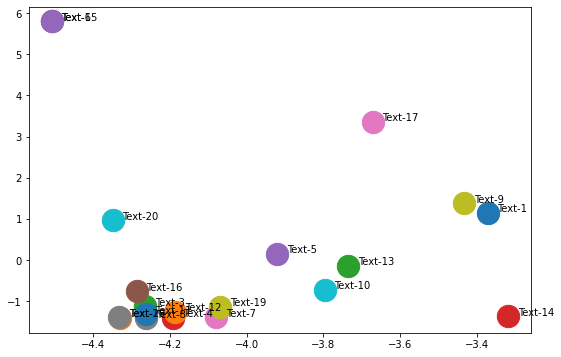

In [ ]:
# n = cos_sim_pca.shape[0]
n = 20
for i in range(n):
    x = cos_sim_pca[i,0]
    y = cos_sim_pca[i,1]
    label = "Text-"+str(i+1)
    plt.scatter(x,y,s=500)
    plt.text(x+0.025,y+0.025,label,fontsize=10)
plt.show()

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 4.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=72a4ff7072e36a2f0da63fc12624fcde80efb84407c435e9e16e8424f826e051
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
cos_sim_pca.shape

(5000, 2)

In [ ]:
Kmean = KMeans(n_clusters=3)
Kmean.fit(cos_sim_pca)
Kmean.cluster_centers_


array([[-3.84459492e+00,  2.94978572e+00],
       [ 2.02413876e+01, -2.01272433e-02],
       [-3.94902588e+00, -6.38922269e-01]])

In [ ]:
Kmean.cluster_centers_[0]

array([-3.84459492,  2.94978572])

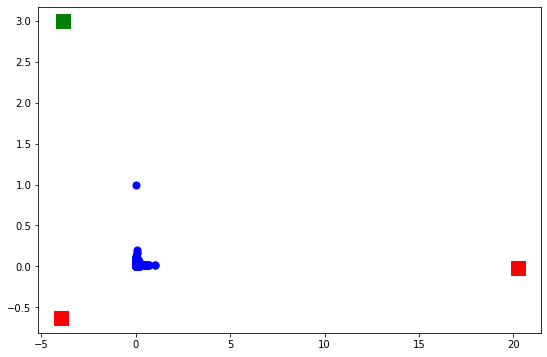

In [ ]:
plt.scatter(cos_similarity[ : , 0], cos_similarity[ : , 1], s =50, c='b')
plt.scatter(-3.84884883e+00,  2.99142386e+00, s=200, c='g', marker='s')
plt.scatter(2.02413876e+01, -2.01272433e-02, s=200, c='r', marker='s')
plt.scatter(-3.94760913e+00, -6.30095612e-01, s=200, c='r', marker='s')
# plt.scatter(2.01559419, 2.02597093, s=200, c='r', marker='s')
plt.show()

## Sentiment Analysis

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

In [ ]:
from random import sample
sample = df.copy()
# sample = df.sample(frac =.25)
noOfTweet = len(sample)
sample

,created_at,id,full_text,screen_name,clean_text,cosine_similarity
0,2022-05-25,1529613220046315520,https://t.co/gm4fjJCpUU There are 46 oblast.et...,GrainedDots,"[oblasteth, russia, like, provinces, etc, extr...","[1.0000000000000002, 0.0024913305086837387, 0...."
1,2022-05-25,1529613218800226304,@Cointelegraph How to survive a #cryptocurrenc...,Polo_btc,"[survive, cryptocurrency, bear, market, drink,...","[0.0024913305086837387, 1.0000000000000002, 0...."
2,2022-05-25,1529613210206314496,~First Mover Asia: Regulatory Attention on Ter...,cryptogainn,"[first, mover, asia, regulatory, attention, te...","[0.0018298875923444787, 0.0023458749271031477,..."
3,2022-05-25,1529613181047431169,@MEXC_CEO I greatly appreciate the support wit...,AnpieEliceo,"[greatly, appreciate, support, lunaburn, suppo...","[0.001757780041211002, 0.0022534346608449854, ..."
4,2022-05-25,1529613174760034305,DoubleHawk42 found #ethereum in a Yellow vault...,DoubleHawk42,"[doublehawk, found, ethereum, yellow, vault, l...","[0.0036098796839923422, 0.004627784939339867, ..."
...,...,...,...,...,...,...
1499,2022-05-25,1529583474767966208,Thankyou to @tradeosiann as they already predi...,MrRock762,"[thankyou, already, predicted, bitcoin, crash,...","[0.00229541749406081, 0.0029426738391357455, 0..."
1500,2022-05-25,1529583458569162752,Thankyou to @tradeosiann as they already predi...,MrRock762,"[thankyou, already, predicted, bitcoin, crash,...","[0.00229541749406081, 0.0029426738391357455, 0..."
1501,2022-05-25,1529583449153093634,Good night team hope you guys banked some good...,10X_Tradingg,"[good, night, team, hope, guys, banked, good, ...","[0.0018789487882625465, 0.002408770281921327, ..."
1502,2022-05-25,1529583447970574337,@c_challengers @OKCNetwork @Jay_OKX @OKX_Ventu...,LION7931,"[ambitious, goal, okcnetwork, project, ultimat...","[0.0016420376225932617, 0.03158340900426052, 0..."


Utility Function

In [ ]:
def percentage(part,whole):
 return 100 * float(part)/float(whole)

def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)

def count_values_in_column(data,feature):
  total=data.loc[:,feature].value_counts(dropna=False)

def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])



In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Getting sentiment values using NLTK VADER

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
sample[['polarity', 'subjectivity']] = sample['full_text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in sample['full_text'].iteritems():
  score = SentimentIntensityAnalyzer().polarity_scores(row)
  neg = score['neg']
  neu = score['neu']
  pos = score['pos']
  comp = score['compound']
  if neg > pos:
    sample.loc[index, 'sentiment'] = "negative"
  elif pos > neg:
    sample.loc[index, 'sentiment'] = "positive"
  else:
    sample.loc[index, 'sentiment'] = "neutral"
  
  sample.loc[index, 'neg'] = neg
  sample.loc[index, 'neu'] = neu
  sample.loc[index, 'pos'] = pos
  sample.loc[index, 'compound'] = comp

sample.head(10)

,created_at,id,full_text,screen_name,clean_text,cosine_similarity,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2022-05-25,1529613220046315520,https://t.co/gm4fjJCpUU There are 46 oblast.et...,GrainedDots,"[oblasteth, russia, like, provinces, etc, extr...","[1.0000000000000002, 0.0024913305086837387, 0....",-0.0625,1.000000,neutral,0.000,1.000,0.000,0.0000
1,2022-05-25,1529613218800226304,@Cointelegraph How to survive a #cryptocurrenc...,Polo_btc,"[survive, cryptocurrency, bear, market, drink,...","[0.0024913305086837387, 1.0000000000000002, 0....",0.0000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,2022-05-25,1529613210206314496,~First Mover Asia: Regulatory Attention on Ter...,cryptogainn,"[first, mover, asia, regulatory, attention, te...","[0.0018298875923444787, 0.0023458749271031477,...",0.2500,0.333333,neutral,0.000,1.000,0.000,0.0000
3,2022-05-25,1529613181047431169,@MEXC_CEO I greatly appreciate the support wit...,AnpieEliceo,"[greatly, appreciate, support, lunaburn, suppo...","[0.001757780041211002, 0.0022534346608449854, ...",0.5000,0.475000,positive,0.000,0.856,0.144,0.7251
4,2022-05-25,1529613174760034305,DoubleHawk42 found #ethereum in a Yellow vault...,DoubleHawk42,"[doublehawk, found, ethereum, yellow, vault, l...","[0.0036098796839923422, 0.004627784939339867, ...",0.5000,0.500000,positive,0.000,0.648,0.352,0.8264
5,2022-05-25,1529613146704740352,@ApiInu @tradingview @BitQuery @Nodereal_io @P...,mra_myt,"[keep, best, greatest, soon, cryptocurrency]","[0.0039050493431375417, 0.005006185834305854, ...",1.0000,0.650000,positive,0.000,0.625,0.375,0.8555
6,2022-05-25,1529613101955485696,Who doesn't like passive income.... APY is ins...,Jas_650,"[nt, like, passive, income, apy, insane, btfa,...","[0.03971284561309115, 0.002560641016759992, 0....",-1.0000,1.000000,negative,0.242,0.758,0.000,-0.6599
7,2022-05-25,1529613101527617536,4 hour top movers report #blockchain #crypto #...,RixxTech,"[hour, top, movers, report, blockchain, crypto...","[0.002298831158898688, 0.002947050081035091, 0...",0.5000,0.500000,positive,0.000,0.904,0.096,0.2023
8,2022-05-25,1529613093126344704,Dont miss the Space!! #Mandox #MandoxMilitia #...,Justa_Guy907,"[dont, miss, space, mandox, mandoxmilitia, nft...","[0.0030674449530635603, 0.003932395757950072, ...",0.0000,0.000000,positive,0.000,0.816,0.184,0.2565
9,2022-05-25,1529613088042782720,westbeachmusic found #bitcoin in a Green vault...,WestBeachMusic,"[westbeachmusic, found, bitcoin, green, vault,...","[0.003895058169000925, 0.004993377372738343, 0...",0.3750,0.650000,positive,0.000,0.648,0.352,0.8264


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
sample_negative = sample[sample["sentiment"]=="negative"]
sample_positive = sample[sample["sentiment"]=="positive"]
sample_neutral = sample[sample["sentiment"]=="neutral"]

In [ ]:
#Count_values for sentiment
pichart = count_values_in_column(sample,'sentiment')
pichart

,Total,Percentage
positive,782,52.20
neutral,500,33.38
negative,216,14.42


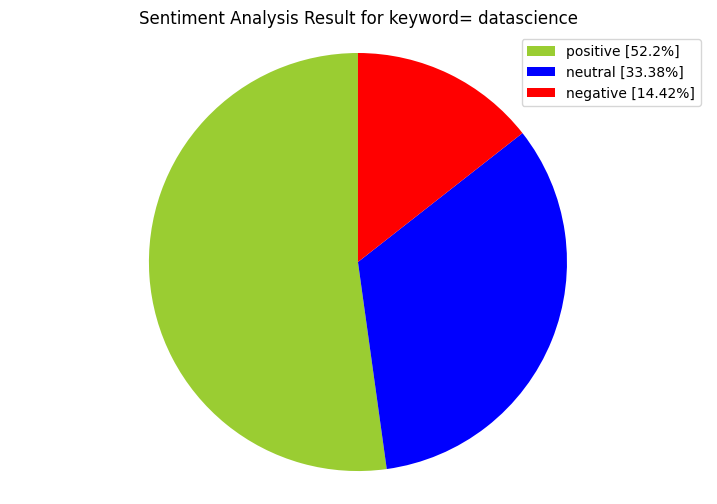

In [ ]:
labels =[]
name =  list(pichart.index)
size = pichart["Percentage"]
for i in range(len(name)):
  labels.append(name[i]+' [' + str(size[i])+'%]')

colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(size,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+ key_words[0] +'' )
plt.axis('equal')
plt.show()

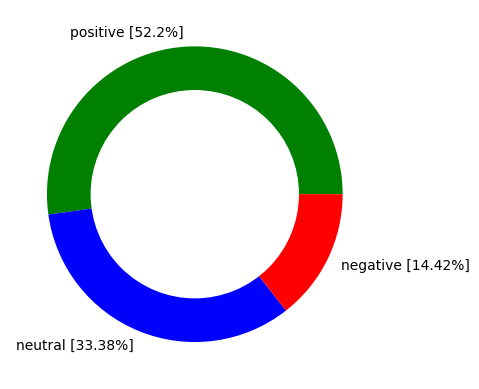

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(sample,"sentiment")
labels = []
names= list(pichart.index)
size=pichart["Percentage"]
for i in range(len(names)):
  labels.append(names[i]+' [' + str(size[i])+'%]')
 
#Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=labels, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
  # mask = np.array(Image.open("|loud.png"))
  stopword = set(stopwords.words('english'))
  wc = WordCloud(background_color="white",
        # mask = mask,
        max_words=3000,
        stopwords=stopword,
        repeat=True)
  
  wc.generate(str(text))
  wc.to_file("wc.png")
  print("Word Cloud Saved Successfully")
  path="wc.png"
  display(Image.open(path))

Word Cloud Saved Successfully


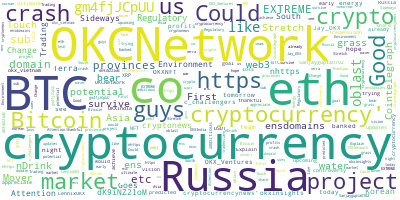

In [ ]:
# Creating wordcloud for all tweets
create_wordcloud(sample['full_text'].values)

Word Cloud Saved Successfully


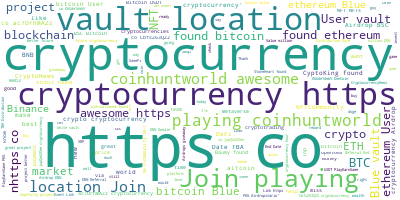

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(sample_positive['full_text'].values)

Word Cloud Saved Successfully


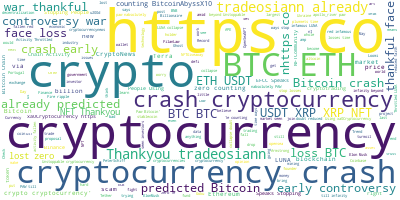

In [ ]:
#Creating wordcloud for Negative sentiment
create_wordcloud(sample_negative['full_text'].values)